In [1]:
using ReachabilityAnalysis, Plots

In [2]:
prob = @ivp(x' = [0 1; -1 0.] * x, x(0) ∈ BallInf(ones(2), 0.2));

In [3]:
sol = solve(prob, T=10.0);

In [6]:
B = Ball2([0.0, -1.0], 0.5) # ball in the 2-norm
sol_touching = filter(R -> !isdisjoint(overapproximate(B, 1e-3), set(R)), array(sol));

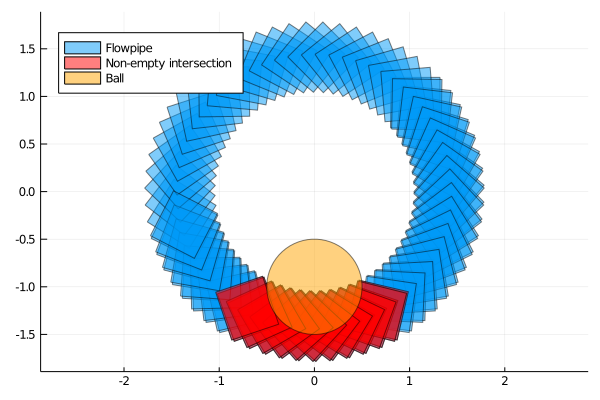

In [7]:
plot(sol, vars=(1, 2), ratio=1., lab="Flowpipe")
plot!(sol_touching, vars=(1, 2), color=:red, alpha=.5, lab="Non-empty intersection")
plot!(B, color=:orange, lab="Ball", legend=:topleft)

In [9]:
# lower bound on the time entering the ball
tstart(sol_touching)

1.7999999999999987

In [10]:
# upper bound on the time leaving the ball
tend(sol_touching)

9.200000000000042

In [13]:
# interval enclosing the time spent intersecting the ball 
tspan(sol_touching)

tspan(sol_touching) = [1.79999, 9.20001]


[1.79999, 9.20001]